Installing MS core fonts to use `Times New Roman`  font:

- apt update
- apt install msttcorefonts -qq
- rm ~/.cache/matplotlib -rf

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.family"] = "Times New Roman"

In [3]:
csv_path = Path("logs/summary.csv")
df = pd.read_csv(csv_path)
df["pricing"] = df.pricing.astype(float) / 3600.0
df["instance"] = df.instance.str.strip()
df = df[df["batch size"] == 1]
df

,instance,type,region,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes
0,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474,469,943,1,16,10,154,125.117,1
1,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474,448,922,1,16,10,153,125.065,1
2,g4dn.xlarge,IaaS,us-east-1,0.000146,1,474,444,918,1,16,10,153,125.086,1
3,p3.2xlarge,IaaS,us-east-1,0.000850,1,449,283,732,1,16,10,184,173.926,1
4,p3.2xlarge,IaaS,us-east-1,0.000850,1,449,249,698,1,16,10,146,136.521,1
5,p3.2xlarge,IaaS,us-east-1,0.000850,1,449,246,695,1,16,10,146,136.409,1
6,p2.xlarge,IaaS,us-east-1,0.000250,1,608,1117,1725,1,16,10,273,181.529,1
7,p2.xlarge,IaaS,us-east-1,0.000250,1,398,1154,1552,1,16,10,239,148.514,1
8,p2.xlarge,IaaS,us-east-1,0.000250,1,436,1117,1553,1,16,10,275,188.090,1
12,ml.g4dn.xlarge,SageMaker,us-east-1,0.000204,1,242,322,564,1,16,10,36,7.358,1


In [4]:
means = df.groupby("instance").mean().reset_index()
means

,instance,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes
0,2xg3s.xlarge,0.000258,1.0,320.000000,357.000000,677.000000,2.0,8.0,10.0,147.000000,NaN,2.0
1,2xg4dn.xlarge,0.000146,1.0,374.000000,304.000000,678.000000,2.0,8.0,10.0,147.000000,NaN,2.0
2,2xg5.xlarge,0.000279,1.0,322.000000,183.000000,505.000000,2.0,8.0,10.0,141.000000,NaN,2.0
3,2xp2.xlarge,0.000250,1.0,373.000000,618.000000,992.000000,2.0,8.0,10.0,183.000000,NaN,2.0
4,2xp3.2xlarge,0.000850,1.0,324.000000,187.000000,511.000000,2.0,8.0,10.0,129.000000,NaN,2.0
5,4xg3s.xlarge,0.000258,1.0,298.000000,219.000000,516.000000,4.0,4.0,10.0,110.000000,NaN,4.0
6,4xg4dn.xlarge,0.000146,1.0,280.000000,186.000000,465.000000,4.0,4.0,10.0,105.000000,NaN,4.0
7,4xg5.xlarge,0.000279,1.0,278.000000,145.000000,423.000000,4.0,4.0,10.0,114.000000,NaN,4.0
8,4xp2.xlarge,0.000250,1.0,306.000000,354.000000,660.000000,4.0,4.0,10.0,123.000000,NaN,4.0
9,4xp3.2xlarge,0.000850,1.0,285.000000,142.000000,427.000000,4.0,4.0,10.0,105.000000,NaN,4.0


In [5]:
instances_group = [
    ["g3s.xlarge", "2xg3s.xlarge", "4xg3s.xlarge", "g3.8xlarge", "g3.16xlarge"],
    ["g4dn.xlarge", "2xg4dn.xlarge", "4xg4dn.xlarge", "g4dn.12xlarge"],
    ["g5.xlarge", "2xg5.xlarge", "4xg5.xlarge"],
    ["p3.2xlarge", "2xp3.2xlarge", "4xp3.2xlarge"],
    ["p2.xlarge", "2xp2.xlarge", "4xp2.xlarge"],
    ["ml.g4dn.xlarge"],
    ["ml.p3.2xlarge"],
]

markers = ["o", "v", "^", "<", ">", "+", "x", "p", "s", "h"]
colors = ["tab:red", "tab:green", "tab:blue", "tab:orange", "tab:purple", "tab:cyan", "tab:olive"]

for instance_group, marker in zip(instances_group, markers):
    for row_index, row in means.iterrows():
        if row["instance"] in instance_group:
            means.loc[row_index, "marker"] = marker
            means.loc[row_index, "color"] = colors[instance_group.index(row["instance"])]
means

,instance,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes,marker,color
0,2xg3s.xlarge,0.000258,1.0,320.000000,357.000000,677.000000,2.0,8.0,10.0,147.000000,NaN,2.0,o,tab:green
1,2xg4dn.xlarge,0.000146,1.0,374.000000,304.000000,678.000000,2.0,8.0,10.0,147.000000,NaN,2.0,v,tab:green
2,2xg5.xlarge,0.000279,1.0,322.000000,183.000000,505.000000,2.0,8.0,10.0,141.000000,NaN,2.0,^,tab:green
3,2xp2.xlarge,0.000250,1.0,373.000000,618.000000,992.000000,2.0,8.0,10.0,183.000000,NaN,2.0,>,tab:green
4,2xp3.2xlarge,0.000850,1.0,324.000000,187.000000,511.000000,2.0,8.0,10.0,129.000000,NaN,2.0,<,tab:green
5,4xg3s.xlarge,0.000258,1.0,298.000000,219.000000,516.000000,4.0,4.0,10.0,110.000000,NaN,4.0,o,tab:blue
6,4xg4dn.xlarge,0.000146,1.0,280.000000,186.000000,465.000000,4.0,4.0,10.0,105.000000,NaN,4.0,v,tab:blue
7,4xg5.xlarge,0.000279,1.0,278.000000,145.000000,423.000000,4.0,4.0,10.0,114.000000,NaN,4.0,^,tab:blue
8,4xp2.xlarge,0.000250,1.0,306.000000,354.000000,660.000000,4.0,4.0,10.0,123.000000,NaN,4.0,>,tab:blue
9,4xp3.2xlarge,0.000850,1.0,285.000000,142.000000,427.000000,4.0,4.0,10.0,105.000000,NaN,4.0,<,tab:blue


In [6]:
means["mean epoch time in seconds"] = (means["training time in seconds"]-means["first.epoch.sec"])/(means["epochs"]-1)
means

,instance,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes,marker,color,mean epoch time in seconds
0,2xg3s.xlarge,0.000258,1.0,320.000000,357.000000,677.000000,2.0,8.0,10.0,147.000000,NaN,2.0,o,tab:green,23.333333
1,2xg4dn.xlarge,0.000146,1.0,374.000000,304.000000,678.000000,2.0,8.0,10.0,147.000000,NaN,2.0,v,tab:green,17.444444
2,2xg5.xlarge,0.000279,1.0,322.000000,183.000000,505.000000,2.0,8.0,10.0,141.000000,NaN,2.0,^,tab:green,4.666667
3,2xp2.xlarge,0.000250,1.0,373.000000,618.000000,992.000000,2.0,8.0,10.0,183.000000,NaN,2.0,>,tab:green,48.333333
4,2xp3.2xlarge,0.000850,1.0,324.000000,187.000000,511.000000,2.0,8.0,10.0,129.000000,NaN,2.0,<,tab:green,6.444444
5,4xg3s.xlarge,0.000258,1.0,298.000000,219.000000,516.000000,4.0,4.0,10.0,110.000000,NaN,4.0,o,tab:blue,12.111111
6,4xg4dn.xlarge,0.000146,1.0,280.000000,186.000000,465.000000,4.0,4.0,10.0,105.000000,NaN,4.0,v,tab:blue,9.000000
7,4xg5.xlarge,0.000279,1.0,278.000000,145.000000,423.000000,4.0,4.0,10.0,114.000000,NaN,4.0,^,tab:blue,3.444444
8,4xp2.xlarge,0.000250,1.0,306.000000,354.000000,660.000000,4.0,4.0,10.0,123.000000,NaN,4.0,>,tab:blue,25.666667
9,4xp3.2xlarge,0.000850,1.0,285.000000,142.000000,427.000000,4.0,4.0,10.0,105.000000,NaN,4.0,<,tab:blue,4.111111


In [7]:
means["projected epochs"] = 3000
means["projected training time in seconds"] = (means["mean epoch time in seconds"]*(means["projected epochs"]-1))+means["first.epoch.sec"]
means["projected total time in seconds"] = means["projected training time in seconds"]+means["boot time in seconds"]
means

,instance,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,first.iter.sec,number of nodes,marker,color,mean epoch time in seconds,projected epochs,projected training time in seconds,projected total time in seconds
0,2xg3s.xlarge,0.000258,1.0,320.000000,357.000000,677.000000,2.0,8.0,10.0,147.000000,NaN,2.0,o,tab:green,23.333333,3000,70123.666667,70443.666667
1,2xg4dn.xlarge,0.000146,1.0,374.000000,304.000000,678.000000,2.0,8.0,10.0,147.000000,NaN,2.0,v,tab:green,17.444444,3000,52462.888889,52836.888889
2,2xg5.xlarge,0.000279,1.0,322.000000,183.000000,505.000000,2.0,8.0,10.0,141.000000,NaN,2.0,^,tab:green,4.666667,3000,14136.333333,14458.333333
3,2xp2.xlarge,0.000250,1.0,373.000000,618.000000,992.000000,2.0,8.0,10.0,183.000000,NaN,2.0,>,tab:green,48.333333,3000,145134.666667,145507.666667
4,2xp3.2xlarge,0.000850,1.0,324.000000,187.000000,511.000000,2.0,8.0,10.0,129.000000,NaN,2.0,<,tab:green,6.444444,3000,19455.888889,19779.888889
5,4xg3s.xlarge,0.000258,1.0,298.000000,219.000000,516.000000,4.0,4.0,10.0,110.000000,NaN,4.0,o,tab:blue,12.111111,3000,36431.222222,36729.222222
6,4xg4dn.xlarge,0.000146,1.0,280.000000,186.000000,465.000000,4.0,4.0,10.0,105.000000,NaN,4.0,v,tab:blue,9.000000,3000,27096.000000,27376.000000
7,4xg5.xlarge,0.000279,1.0,278.000000,145.000000,423.000000,4.0,4.0,10.0,114.000000,NaN,4.0,^,tab:blue,3.444444,3000,10443.888889,10721.888889
8,4xp2.xlarge,0.000250,1.0,306.000000,354.000000,660.000000,4.0,4.0,10.0,123.000000,NaN,4.0,>,tab:blue,25.666667,3000,77097.333333,77403.333333
9,4xp3.2xlarge,0.000850,1.0,285.000000,142.000000,427.000000,4.0,4.0,10.0,105.000000,NaN,4.0,<,tab:blue,4.111111,3000,12434.222222,12719.222222


In [8]:
means.instance = means.instance.apply(lambda x: f"{x} (1x)" if not x.startswith("2x") and not x.startswith("4x") else f"{x[2:]} ({x[:2]})")

means["boot time cost"] = means["boot time in seconds"] * means["pricing"] * means["number of nodes"]
means["training time cost"] = means["training time in seconds"] * means["pricing"] * means["number of nodes"]
means["projected training time cost"] = means["projected training time in seconds"] * means["pricing"] * means["number of nodes"]
means["total time cost"] = means["total time in seconds"] * means["pricing"] * means["number of nodes"]
means["projected total time cost"] = means["projected total time in seconds"] * means["pricing"] * means["number of nodes"]

means = means.sort_values(by=["marker", "instance", "color"], ignore_index=True)
means

,instance,pricing,batch size,boot time in seconds,training time in seconds,total time in seconds,tasks,iter.per.task,epochs,first.epoch.sec,...,color,mean epoch time in seconds,projected epochs,projected training time in seconds,projected total time in seconds,boot time cost,training time cost,projected training time cost,total time cost,projected total time cost
0,ml.g4dn.xlarge (1x),0.000204,1.0,234.000000,326.333333,560.333333,1.0,16.0,10.0,35.333333,...,tab:red,32.333333,3000,97003.000000,97237.000000,0.047840,0.066717,19.831724,0.114557,19.879564
1,p3.2xlarge (1x),0.000850,1.0,449.000000,259.333333,708.333333,1.0,16.0,10.0,158.666667,...,tab:red,11.185185,3000,33703.037037,34152.037037,0.381650,0.220433,28.647581,0.602083,29.029231
2,p3.2xlarge (2x),0.000850,1.0,324.000000,187.000000,511.000000,2.0,8.0,10.0,129.000000,...,tab:green,6.444444,3000,19455.888889,19779.888889,0.550800,0.317900,33.075011,0.868700,33.625811
3,p3.2xlarge (4x),0.000850,1.0,285.000000,142.000000,427.000000,4.0,4.0,10.0,105.000000,...,tab:blue,4.111111,3000,12434.222222,12719.222222,0.969000,0.482800,42.276356,1.451800,43.245356
4,p2.xlarge (1x),0.000250,1.0,480.666667,1129.333333,1610.000000,1.0,16.0,10.0,262.333333,...,tab:red,96.333333,3000,289166.000000,289646.666667,0.120167,0.282333,72.291500,0.402500,72.411667
5,p2.xlarge (2x),0.000250,1.0,373.000000,618.000000,992.000000,2.0,8.0,10.0,183.000000,...,tab:green,48.333333,3000,145134.666667,145507.666667,0.186500,0.309000,72.567333,0.496000,72.753833
6,p2.xlarge (4x),0.000250,1.0,306.000000,354.000000,660.000000,4.0,4.0,10.0,123.000000,...,tab:blue,25.666667,3000,77097.333333,77403.333333,0.306000,0.354000,77.097333,0.660000,77.403333
7,g5.xlarge (1x),0.000279,1.0,351.000000,207.666667,559.333333,1.0,16.0,10.0,137.666667,...,tab:red,7.777778,3000,23463.222222,23814.222222,0.098085,0.058031,6.556667,0.156303,6.654752
8,g5.xlarge (2x),0.000279,1.0,322.000000,183.000000,505.000000,2.0,8.0,10.0,141.000000,...,tab:green,4.666667,3000,14136.333333,14458.333333,0.179962,0.102277,7.900640,0.282239,8.080602
9,g5.xlarge (4x),0.000279,1.0,278.000000,145.000000,423.000000,4.0,4.0,10.0,114.000000,...,tab:blue,3.444444,3000,10443.888889,10721.888889,0.310742,0.162078,11.673947,0.472820,11.984689


In [9]:
def select_pareto_frontier_points(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    return pareto_front

# Total training time only

# All instances

In [10]:
selected_means = means.copy()

In [11]:
multi_node = [
    ["g3s.xlarge (1x)", "g3s.xlarge (2x)", "g3s.xlarge (4x)"],
    ["g4dn.xlarge (1x)", "g4dn.xlarge (2x)", "g4dn.xlarge (4x)"],
    ["g5.xlarge (1x)", "g5.xlarge (2x)", "g5.xlarge (4x)"],
    ["p3.2xlarge (1x)", "p3.2xlarge (2x)", "p3.2xlarge (4x)"],
    ["p2.xlarge (1x)", "p2.xlarge (2x)", "p2.xlarge (4x)"]
]

multi_gpu = [
    ["g3s.xlarge (1x)", "g3.8xlarge (1x)", "g3.16xlarge (1x)"],
    ["g4dn.xlarge (1x)", "g4dn.12xlarge (1x)"],
]

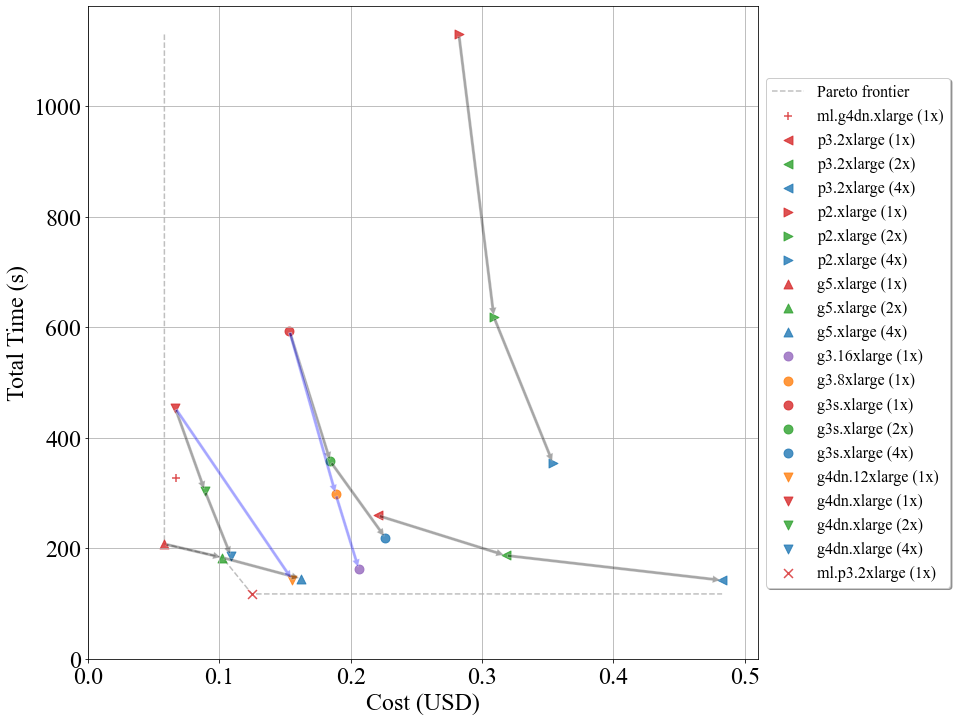

In [12]:
###### instances = selected_means.instance.values
# paretto_frontier_instance = ['g5.xlarge', '4xg4dn.xlarge', 'ml.p3.2xlarge']
# paretto_points = [i.strip() in paretto_frontier_instance for i in instances] 
# paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["training time cost"].values
ys = selected_means["training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
# pareto_indexes = []
# for x, y in pareto_front:
#     val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
#     pareto_indexes.append(val)

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(12, 12))

pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier", zorder=-1, alpha=0.5)

for i, node_list in enumerate(multi_node):
    for j in range(len(node_list)-1):
        vm_start, vm_end = node_list[j], node_list[j+1]
        x0 = selected_means.loc[selected_means.instance == vm_start, "training time cost"].values[0]
        y0 = selected_means.loc[selected_means.instance == vm_start, "training time in seconds"].values[0]
        x1 = selected_means.loc[selected_means.instance == vm_end, "training time cost"].values[0]
        y1 = selected_means.loc[selected_means.instance == vm_end, "training time in seconds"].values[0]

        arrow = mpatches.FancyArrowPatch((x0, y0), (x1, y1), arrowstyle="simple", mutation_scale=15, edgecolor="white", fill=True, facecolor="black", alpha=0.35, 
                                         linestyle='-', linewidth=0.8, zorder=10 )
        arrow.set_antialiased(True)
        ax.add_patch(arrow)
    
for i, node_list in enumerate(multi_gpu):
    for j in range(len(node_list)-1):
        vm_start, vm_end = node_list[j], node_list[j+1]
        x0 = selected_means.loc[selected_means.instance == vm_start, "training time cost"].values[0]
        y0 = selected_means.loc[selected_means.instance == vm_start, "training time in seconds"].values[0]
        x1 = selected_means.loc[selected_means.instance == vm_end, "training time cost"].values[0]
        y1 = selected_means.loc[selected_means.instance == vm_end, "training time in seconds"].values[0]
        arrow = mpatches.FancyArrowPatch((x0, y0), (x1, y1), arrowstyle="simple", mutation_scale=15, edgecolor="white", fill=True, facecolor="blue", alpha=0.35, 
                                         linestyle='-', linewidth=0.8, zorder=10 )
        arrow.set_antialiased(True)
        ax.add_patch(arrow)
        
        

for row_index, row in selected_means.iterrows():
    ax.scatter(row["training time cost"], row["training time in seconds"], s=80, label=row["instance"], marker=row["marker"], c=row["color"], alpha=0.80)
    
ax.set_xlabel("Cost (USD)", fontsize=24)
ax.set_ylabel("Total Time (s)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=16, fancybox=True, shadow=True, loc='center left', bbox_to_anchor=(1, 0.5))

ax.grid()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.savefig("img/instances-cost-pareto-all.pdf", bbox_inches="tight") 
plt.show()

# All except SM

In [13]:
selected_means = means[~means.instance.str.startswith("ml.")]

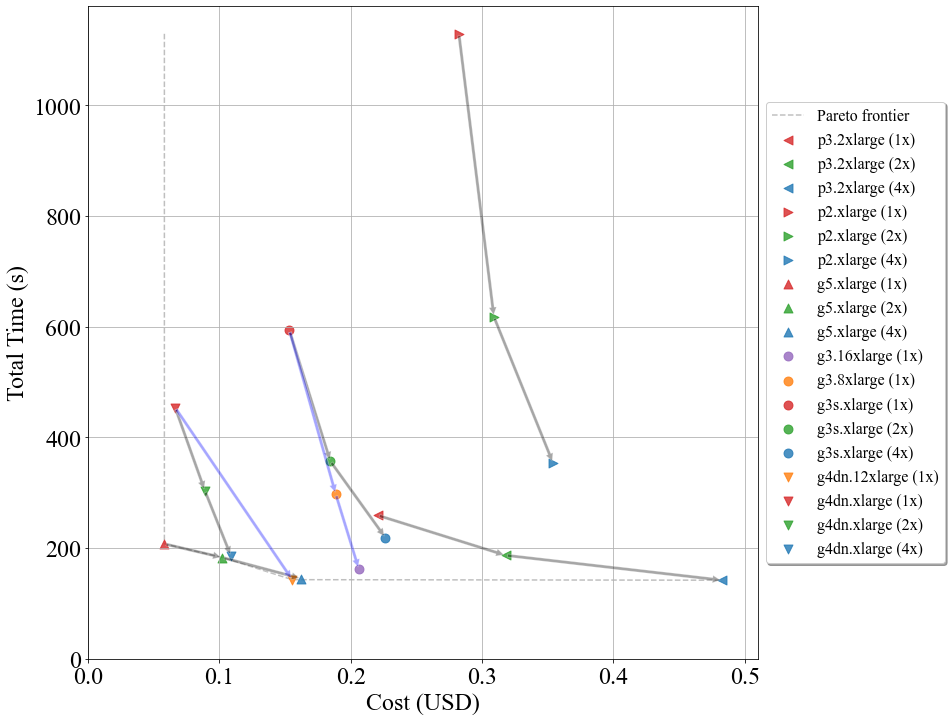

In [14]:
instances = selected_means.instance.values
# paretto_frontier_instance = ['g5.xlarge', '4xg4dn.xlarge', 'ml.p3.2xlarge']
# paretto_points = [i.strip() in paretto_frontier_instance for i in instances] 
# paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["training time cost"].values
ys = selected_means["training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
# pareto_indexes = []
# for x, y in pareto_front:
#     val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
#     pareto_indexes.append(val)

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(12, 12))

pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier", zorder=-1, alpha=0.5)

for i, node_list in enumerate(multi_node):
    for j in range(len(node_list)-1):
        vm_start, vm_end = node_list[j], node_list[j+1]
        x0 = selected_means.loc[selected_means.instance == vm_start, "training time cost"].values[0]
        y0 = selected_means.loc[selected_means.instance == vm_start, "training time in seconds"].values[0]
        x1 = selected_means.loc[selected_means.instance == vm_end, "training time cost"].values[0]
        y1 = selected_means.loc[selected_means.instance == vm_end, "training time in seconds"].values[0]

        arrow = mpatches.FancyArrowPatch((x0, y0), (x1, y1), arrowstyle="simple", mutation_scale=15, edgecolor="white", fill=True, facecolor="black", alpha=0.35, 
                                         linestyle='-', linewidth=0.8, zorder=10 )
        arrow.set_antialiased(True)
        ax.add_patch(arrow)
    
for i, node_list in enumerate(multi_gpu):
    for j in range(len(node_list)-1):
        vm_start, vm_end = node_list[j], node_list[j+1]
        x0 = selected_means.loc[selected_means.instance == vm_start, "training time cost"].values[0]
        y0 = selected_means.loc[selected_means.instance == vm_start, "training time in seconds"].values[0]
        x1 = selected_means.loc[selected_means.instance == vm_end, "training time cost"].values[0]
        y1 = selected_means.loc[selected_means.instance == vm_end, "training time in seconds"].values[0]
        arrow = mpatches.FancyArrowPatch((x0, y0), (x1, y1), arrowstyle="simple", mutation_scale=15, edgecolor="white", fill=True, facecolor="blue", alpha=0.35, 
                                         linestyle='-', linewidth=0.8, zorder=10 )
        arrow.set_antialiased(True)
        ax.add_patch(arrow)
        
        

for row_index, row in selected_means.iterrows():
    ax.scatter(row["training time cost"], row["training time in seconds"], s=80, label=row["instance"], marker=row["marker"], c=row["color"], alpha=0.80)
    
ax.set_xlabel("Cost (USD)", fontsize=24)
ax.set_ylabel("Total Time (s)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=16, fancybox=True, shadow=True, loc='center left', bbox_to_anchor=(1, 0.5))

ax.grid()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.savefig("img/instances-cost-pareto-except-SM.pdf", bbox_inches="tight") 
plt.show()

# All except Distributed and Single-Node Multi GPU

In [15]:
selected_means = means[(means.instance.str.contains("1x") & ~means.instance.str.contains("g3.8xlarge|g3.16xlarge|g4dn.12xlarge"))]

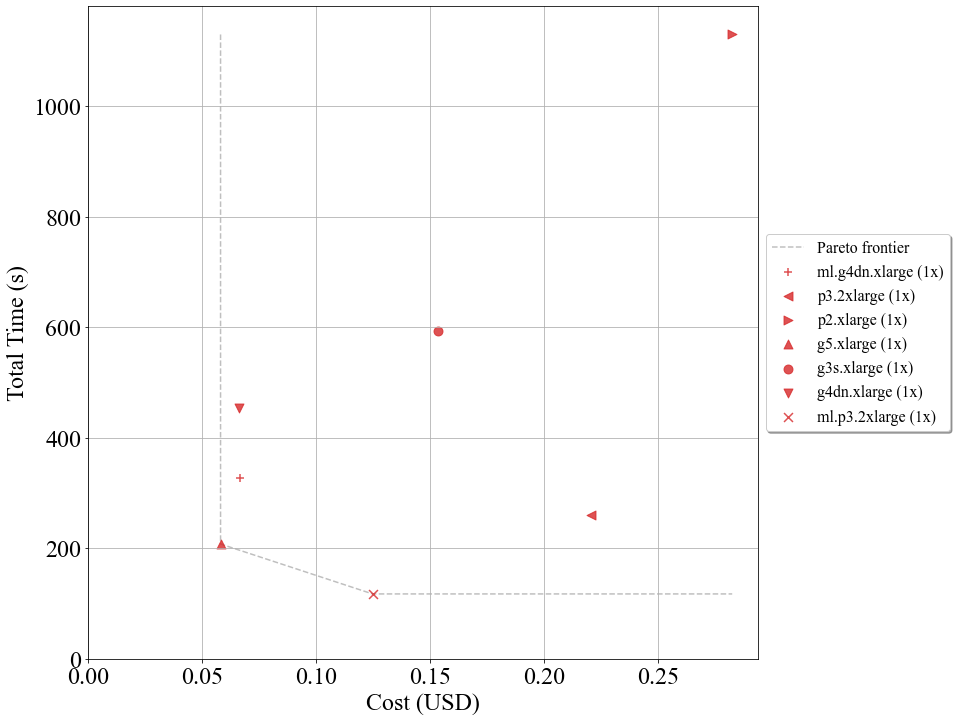

In [16]:
instances = selected_means.instance.values
# paretto_frontier_instance = ['g5.xlarge', '4xg4dn.xlarge', 'ml.p3.2xlarge']
# paretto_points = [i.strip() in paretto_frontier_instance for i in instances] 
# paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["training time cost"].values
ys = selected_means["training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
# pareto_indexes = []
# for x, y in pareto_front:
#     val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
#     pareto_indexes.append(val)

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(12, 12))

pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier", zorder=-1, alpha=0.5)

for row_index, row in selected_means.iterrows():
    ax.scatter(row["training time cost"], row["training time in seconds"], s=80, label=row["instance"], marker=row["marker"], c=row["color"], alpha=0.80)
    
ax.set_xlabel("Cost (USD)", fontsize=24)
ax.set_ylabel("Total Time (s)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=16, fancybox=True, shadow=True, loc='center left', bbox_to_anchor=(1, 0.5))

ax.grid()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.savefig("img/instances-cost-pareto-except-distributed.pdf", bbox_inches="tight") 
plt.show()

# Estimated 1000 epochs

# All Instances

In [17]:
selected_means = means.copy()

In [18]:
multi_node = [
    ["g3s.xlarge (1x)", "g3s.xlarge (2x)", "g3s.xlarge (4x)"],
    ["g4dn.xlarge (1x)", "g4dn.xlarge (2x)", "g4dn.xlarge (4x)"],
    ["g5.xlarge (1x)", "g5.xlarge (2x)", "g5.xlarge (4x)"],
    ["p3.2xlarge (1x)", "p3.2xlarge (2x)", "p3.2xlarge (4x)"],
    ["p2.xlarge (1x)", "p2.xlarge (2x)", "p2.xlarge (4x)"]
]

multi_gpu = [
    ["g3s.xlarge (1x)", "g3.8xlarge (1x)", "g3.16xlarge (1x)"],
    ["g4dn.xlarge (1x)", "g4dn.12xlarge (1x)"],
]

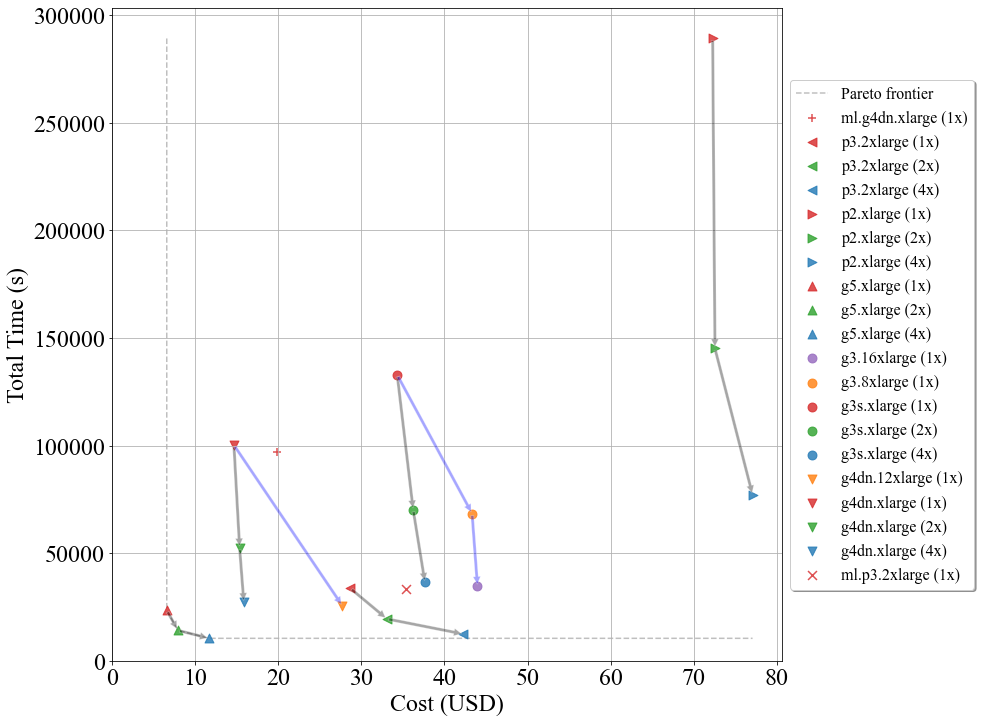

In [19]:
instances = selected_means.instance.values
# paretto_frontier_instance = ['g5.xlarge', '4xg4dn.xlarge', 'ml.p3.2xlarge']
# paretto_points = [i.strip() in paretto_frontier_instance for i in instances] 
# paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["projected training time cost"].values
ys = selected_means["projected training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
# pareto_indexes = []
# for x, y in pareto_front:
#     val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
#     pareto_indexes.append(val)

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(12, 12))

pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier", zorder=-1, alpha=0.5)

for i, node_list in enumerate(multi_node):
    for j in range(len(node_list)-1):
        vm_start, vm_end = node_list[j], node_list[j+1]
        x0 = selected_means.loc[selected_means.instance == vm_start, "projected training time cost"].values[0]
        y0 = selected_means.loc[selected_means.instance == vm_start, "projected training time in seconds"].values[0]
        x1 = selected_means.loc[selected_means.instance == vm_end, "projected training time cost"].values[0]
        y1 = selected_means.loc[selected_means.instance == vm_end, "projected training time in seconds"].values[0]

        arrow = mpatches.FancyArrowPatch((x0, y0), (x1, y1), arrowstyle="simple", mutation_scale=15, edgecolor="white", fill=True, facecolor="black", alpha=0.35, 
                                         linestyle='-', linewidth=0.8, zorder=10 )
        arrow.set_antialiased(True)
        ax.add_patch(arrow)
    
for i, node_list in enumerate(multi_gpu):
    for j in range(len(node_list)-1):
        vm_start, vm_end = node_list[j], node_list[j+1]
        x0 = selected_means.loc[selected_means.instance == vm_start, "projected training time cost"].values[0]
        y0 = selected_means.loc[selected_means.instance == vm_start, "projected training time in seconds"].values[0]
        x1 = selected_means.loc[selected_means.instance == vm_end, "projected training time cost"].values[0]
        y1 = selected_means.loc[selected_means.instance == vm_end, "projected training time in seconds"].values[0]
        arrow = mpatches.FancyArrowPatch((x0, y0), (x1, y1), arrowstyle="simple", mutation_scale=15, edgecolor="white", fill=True, facecolor="blue", alpha=0.35, 
                                         linestyle='-', linewidth=0.8, zorder=10 )
        arrow.set_antialiased(True)
        ax.add_patch(arrow)
        
        

for row_index, row in selected_means.iterrows():
    ax.scatter(row["projected training time cost"], row["projected training time in seconds"], s=80, label=row["instance"], marker=row["marker"], c=row["color"], alpha=0.80)
    
ax.set_xlabel("Cost (USD)", fontsize=24)
ax.set_ylabel("Total Time (s)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=16, fancybox=True, shadow=True, loc='center left', bbox_to_anchor=(1, 0.5))

ax.grid()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.savefig("img/instances-cost-pareto-all-estimated.pdf", bbox_inches="tight") 
plt.show()

# All except SM

In [20]:
selected_means = means[~means.instance.str.startswith("ml.")]

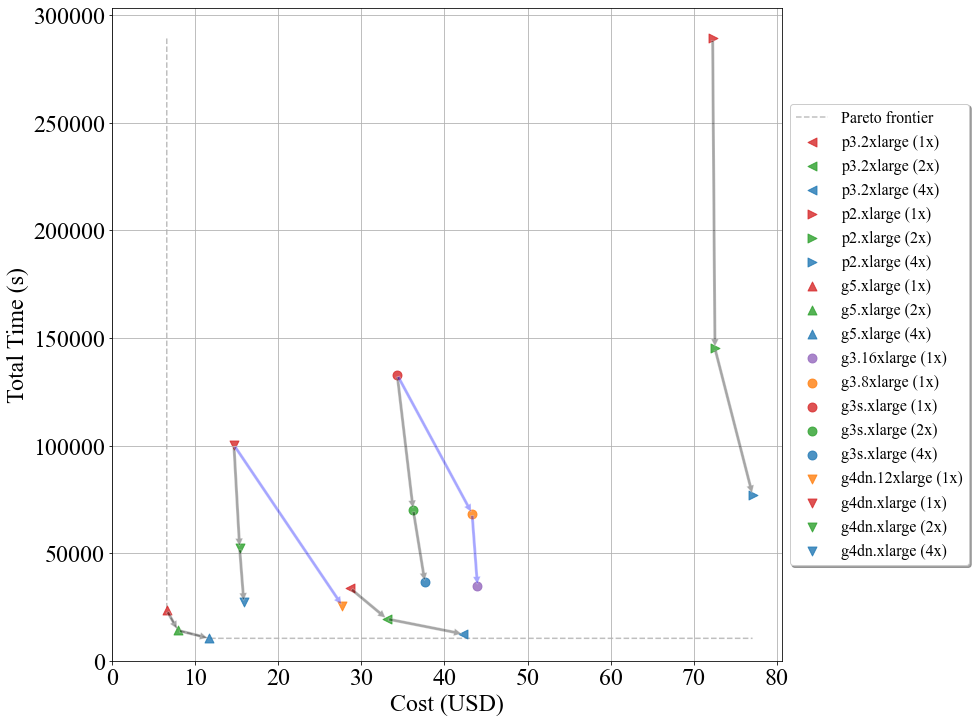

In [21]:
instances = selected_means.instance.values
# paretto_frontier_instance = ['g5.xlarge', '4xg4dn.xlarge', 'ml.p3.2xlarge']
# paretto_points = [i.strip() in paretto_frontier_instance for i in instances] 
# paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["projected training time cost"].values
ys = selected_means["projected training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
# pareto_indexes = []
# for x, y in pareto_front:
#     val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
#     pareto_indexes.append(val)

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(12, 12))

pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier", zorder=-1, alpha=0.5)

for i, node_list in enumerate(multi_node):
    for j in range(len(node_list)-1):
        vm_start, vm_end = node_list[j], node_list[j+1]
        x0 = selected_means.loc[selected_means.instance == vm_start, "projected training time cost"].values[0]
        y0 = selected_means.loc[selected_means.instance == vm_start, "projected training time in seconds"].values[0]
        x1 = selected_means.loc[selected_means.instance == vm_end, "projected training time cost"].values[0]
        y1 = selected_means.loc[selected_means.instance == vm_end, "projected training time in seconds"].values[0]

        arrow = mpatches.FancyArrowPatch((x0, y0), (x1, y1), arrowstyle="simple", mutation_scale=15, edgecolor="white", fill=True, facecolor="black", alpha=0.35, 
                                         linestyle='-', linewidth=0.8, zorder=10 )
        arrow.set_antialiased(True)
        ax.add_patch(arrow)
    
for i, node_list in enumerate(multi_gpu):
    for j in range(len(node_list)-1):
        vm_start, vm_end = node_list[j], node_list[j+1]
        x0 = selected_means.loc[selected_means.instance == vm_start, "projected training time cost"].values[0]
        y0 = selected_means.loc[selected_means.instance == vm_start, "projected training time in seconds"].values[0]
        x1 = selected_means.loc[selected_means.instance == vm_end, "projected training time cost"].values[0]
        y1 = selected_means.loc[selected_means.instance == vm_end, "projected training time in seconds"].values[0]
        arrow = mpatches.FancyArrowPatch((x0, y0), (x1, y1), arrowstyle="simple", mutation_scale=15, edgecolor="white", fill=True, facecolor="blue", alpha=0.35, 
                                         linestyle='-', linewidth=0.8, zorder=10 )
        arrow.set_antialiased(True)
        ax.add_patch(arrow)
        
        

for row_index, row in selected_means.iterrows():
    ax.scatter(row["projected training time cost"], row["projected training time in seconds"], s=80, label=row["instance"], marker=row["marker"], c=row["color"], alpha=0.80)
    
ax.set_xlabel("Cost (USD)", fontsize=24)
ax.set_ylabel("Total Time (s)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=16, fancybox=True, shadow=True, loc='center left', bbox_to_anchor=(1, 0.5))

ax.grid()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.savefig("img/instances-cost-pareto-except-SM-estimated.pdf", bbox_inches="tight") 
plt.show()

# All except Distributed and Single-Node Multi GPU

In [22]:
selected_means = means[(means.instance.str.contains("1x") & ~means.instance.str.contains("g3.8xlarge|g3.16xlarge|g4dn.12xlarge"))]

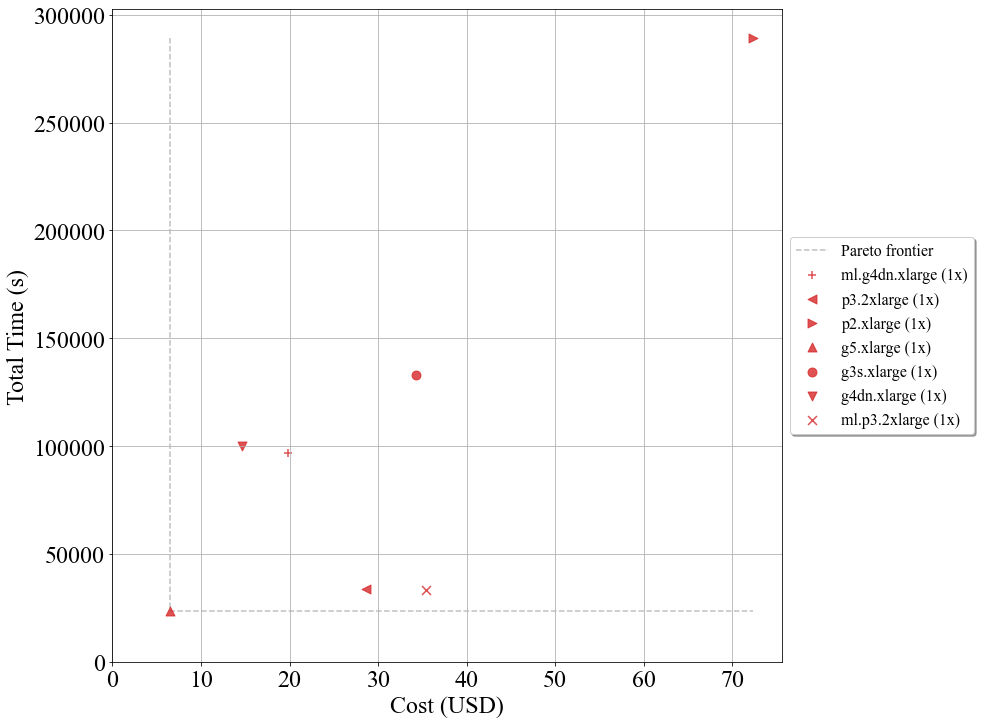

In [23]:
instances = selected_means.instance.values
# paretto_frontier_instance = ['g5.xlarge', '4xg4dn.xlarge', 'ml.p3.2xlarge']
# paretto_points = [i.strip() in paretto_frontier_instance for i in instances] 
# paretto_colors = [ "red" if i else "blue" for i in paretto_points ]

xs = selected_means["projected training time cost"].values
ys = selected_means["projected training time in seconds"].values

# Collect pareto frontier points to draw dashed line
pareto_front = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
# print(pareto_index, pareto_front)
# pareto_indexes = []
# for x, y in pareto_front:
#     val = [i for i, (_x, _y) in enumerate(zip(xs, ys)) if _x==x and _y==y][0]
#     pareto_indexes.append(val)

plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(figsize=(12, 12))

pf_X = [pair[0] for pair in pareto_front]
pf_Y = [pair[1] for pair in pareto_front]
pf_X.insert(0,pf_X[0])
pf_Y.insert(0,max(ys))
pf_X.append(max(xs))
pf_Y.append(pf_Y[-1])

ax.plot(pf_X, pf_Y,color='gray', linestyle='dashed', label="Pareto frontier", zorder=-1, alpha=0.5)



for row_index, row in selected_means.iterrows():
    ax.scatter(row["projected training time cost"], row["projected training time in seconds"], s=80, label=row["instance"], marker=row["marker"], c=row["color"], alpha=0.80)
    
ax.set_xlabel("Cost (USD)", fontsize=24)
ax.set_ylabel("Total Time (s)", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=16, fancybox=True, shadow=True, loc='center left', bbox_to_anchor=(1, 0.5))

ax.grid()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.savefig("img/instances-cost-pareto-except-distributed-estimated.pdf", bbox_inches="tight") 
plt.show()

In [24]:
means.loc[means.instance == "g4dn.xlarge (1x)", "training time in seconds"].values[0] / means.loc[means.instance == "ml.g4dn.xlarge (1x)", "training time in seconds"].values[0]

1.390194075587334

In [25]:
means.loc[means.instance == "p2.xlarge (1x)", "training time cost"].values[0] / means.loc[means.instance == "g5.xlarge (1x)", "training time cost"].values[0]

4.865190877208658

In [26]:
means.loc[means.instance == "g5.xlarge (1x)", "projected training time in seconds"].values[0] / means.loc[means.instance == "g5.xlarge (4x)", "projected training time in seconds"].values[0]

2.246598223309751

In [27]:
means.loc[means.instance == "g5.xlarge (4x)", "projected training time cost"].values[0] / means.loc[means.instance == "g5.xlarge (1x)", "projected training time cost"].values[0]

1.78046967121121

In [28]:
means.loc[means.instance == "p2.xlarge (1x)", "training time in seconds"].values[0] / means.loc[means.instance == "p2.xlarge (4x)", "training time in seconds"].values[0]

3.190207156308851